In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_pickle("brussels_2014.pickle")

In [3]:
sample = df.filter(regex="NO2").dropna()

In [4]:
X = sample.values

In [5]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=5)),
])

In [6]:
model.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5))])

In [7]:
pca = model.steps[-1][1]

In [8]:
pca.mean_

array([ 1.27666297e-16,  1.48944013e-16,  9.57497230e-17,  8.51108648e-17,
       -3.19165743e-17,  1.06388581e-16,  1.43624584e-16, -5.31942905e-17,
       -3.19165743e-17])

In [9]:
pca.singular_values_

array([195.35164262,  64.99852006,  42.39742262,  31.64586464,
        29.91062217])

In [10]:
pca.explained_variance_ratio_

array([0.79360876, 0.08785758, 0.03738103, 0.02082602, 0.01860472])

In [11]:
print(pca.components_)

[[ 0.35387629  0.34939865  0.26133604  0.34486007  0.34174115  0.33938524
   0.35071246  0.3160161   0.3326145 ]
 [-0.13651887 -0.13862255  0.74936213 -0.25042816 -0.20512798  0.14172041
  -0.08607721  0.42955913 -0.28947545]
 [ 0.18892831 -0.32283253  0.0393505  -0.0031461   0.48165015  0.51475411
  -0.08586993 -0.38020137 -0.45786625]
 [ 0.09005516 -0.19627126 -0.59427944 -0.12791134 -0.13288921  0.33642997
   0.07192584  0.6434086  -0.18397195]
 [ 0.42327372  0.08707977  0.0157916  -0.25809673 -0.09806515 -0.3511231
   0.65274837 -0.09949994 -0.42131733]]


In [12]:
pca.explained_variance_

array([7.14381585, 0.79086627, 0.33649222, 0.18746925, 0.16747385])

In [13]:
pca.noise_variance_

0.09389182901917437

In [14]:
Xt = model.transform(X)

In [15]:
Xt

array([[-2.2763059 , -0.09567869,  0.3832856 , -0.13712266,  0.1481071 ],
       [-2.94046037, -0.18973248,  0.11338029, -0.05182182, -0.0696848 ],
       [-2.72433515,  0.08616972,  0.28555603, -0.15175684, -0.04022005],
       ...,
       [ 2.10421705, -0.77299434, -0.21398975,  0.30648758,  0.31994408],
       [ 3.57831882, -0.76788007,  0.05074947,  0.53013058,  0.30880637],
       [ 4.12726943, -0.72554819,  0.06946534,  0.47641086,  0.21280394]])

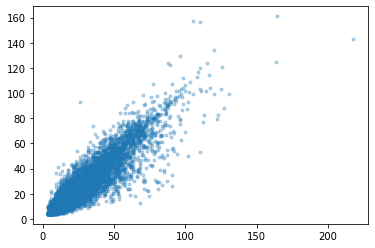

In [16]:
fig, axe = plt.subplots()
axe.plot(X[:,0], X[:,1], '.', alpha=0.3)

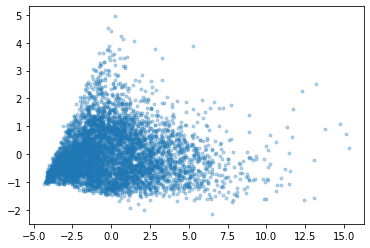

In [17]:
fig, axe = plt.subplots()
axe.plot(Xt[:,0], Xt[:,1], '.', alpha=0.3)

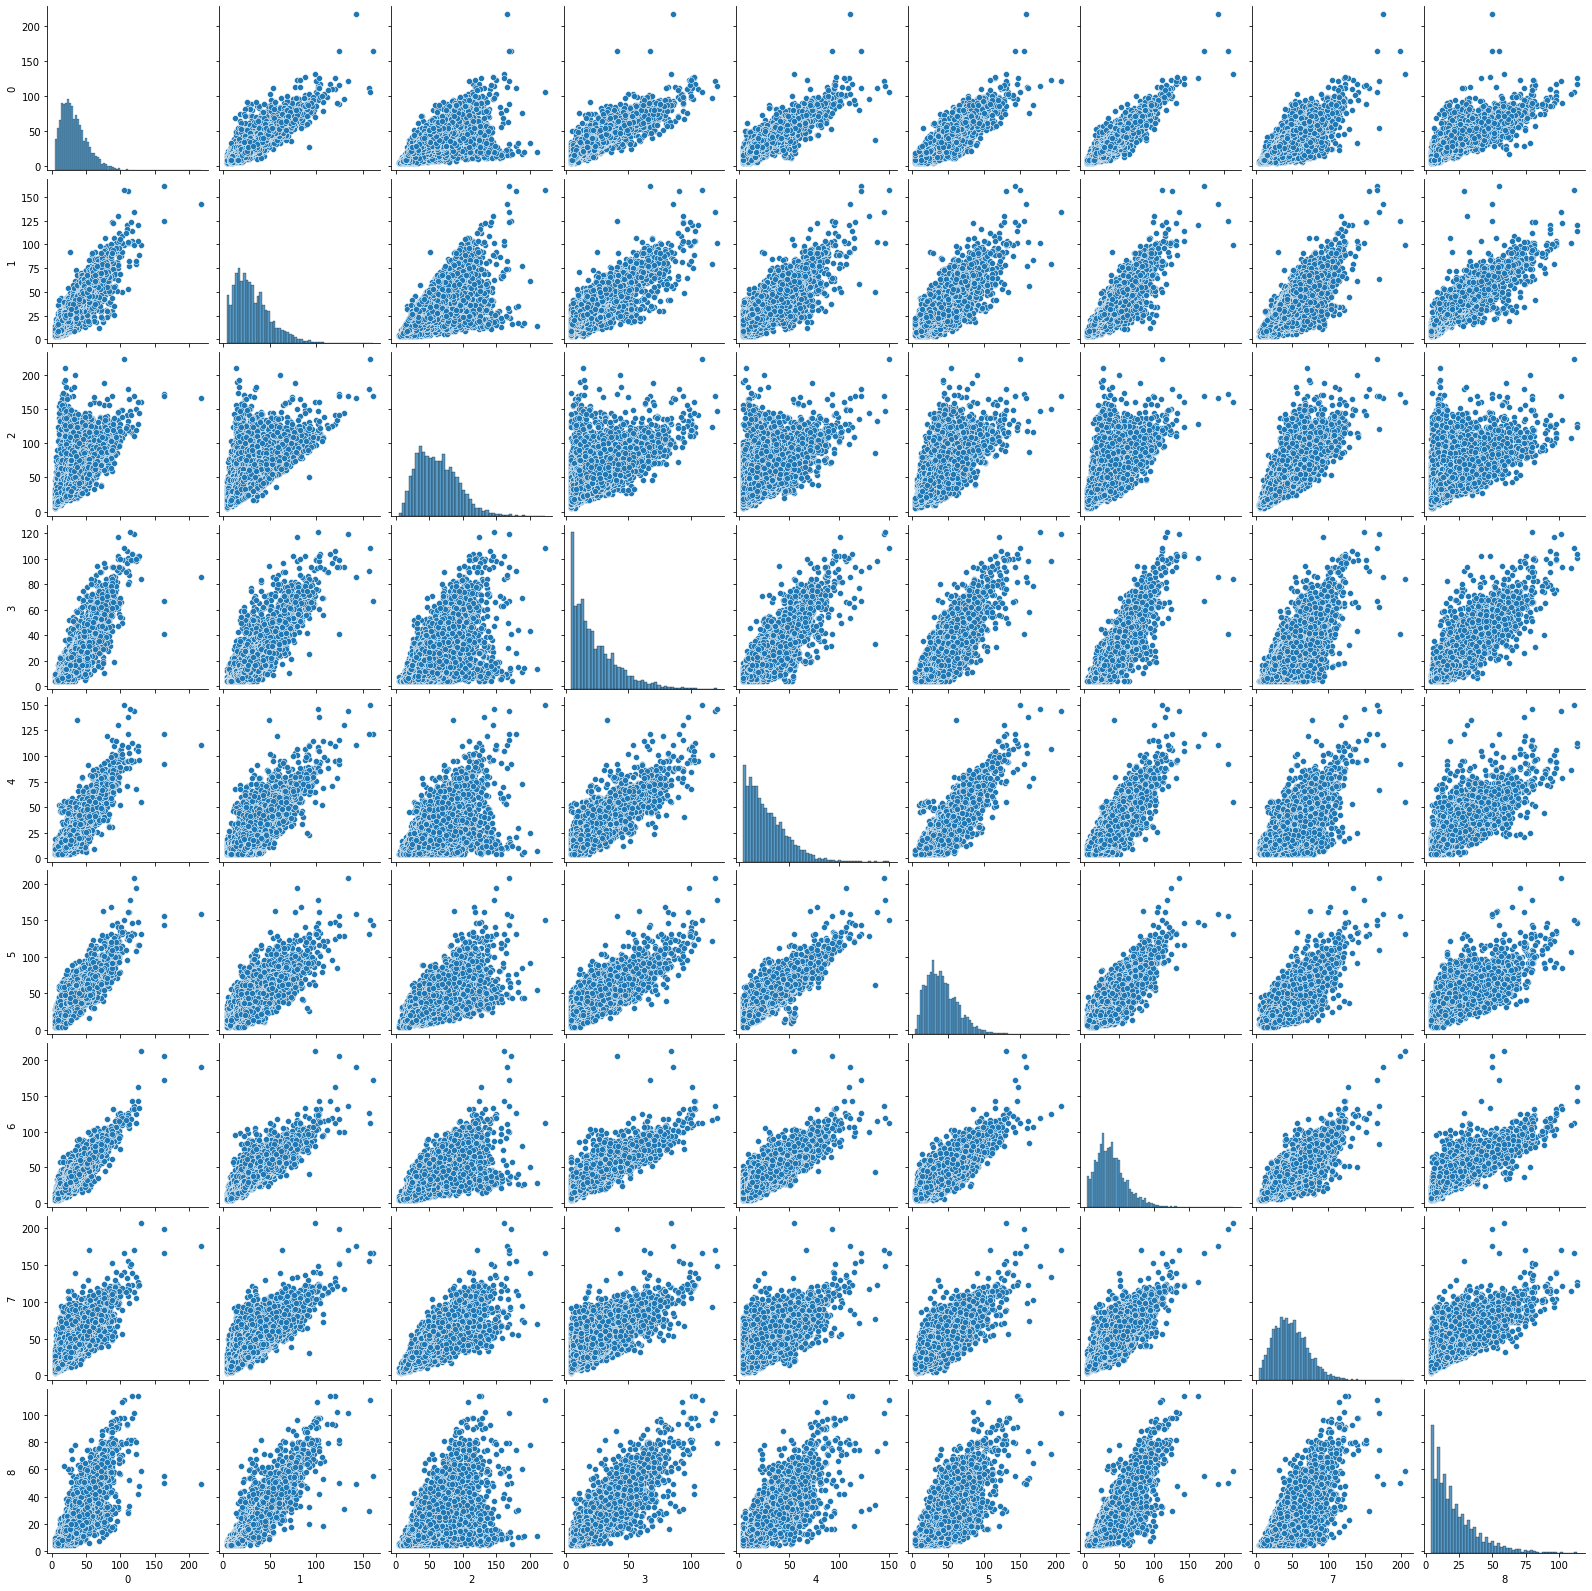

In [18]:
sns.pairplot(pd.DataFrame(X))

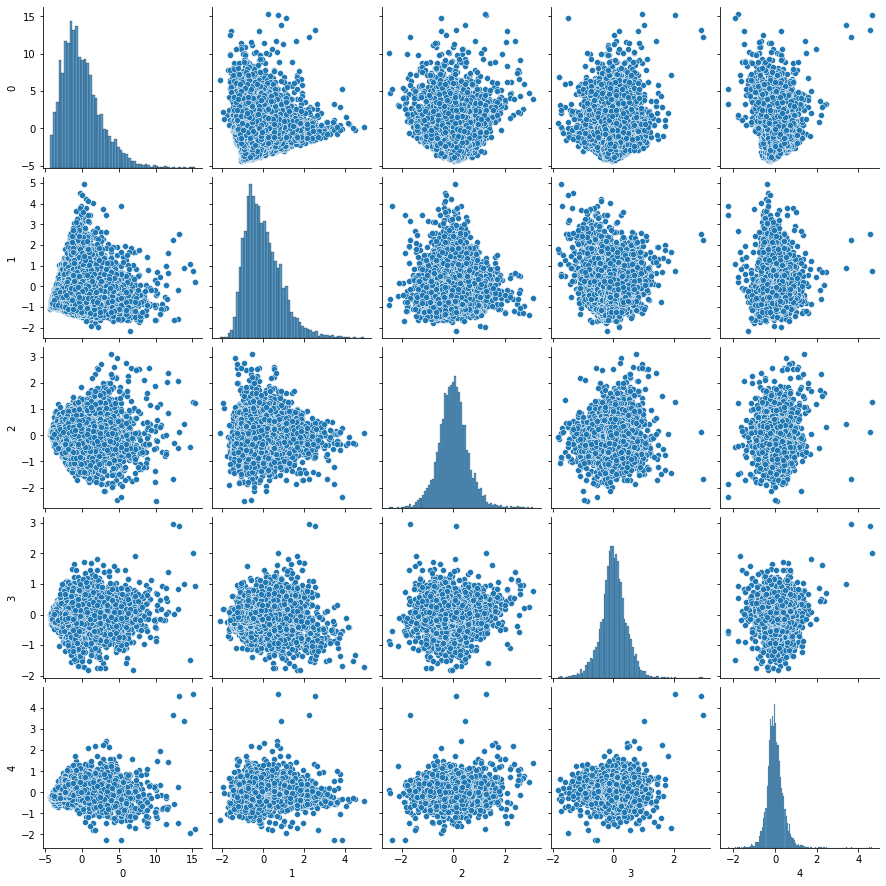

In [19]:
sns.pairplot(pd.DataFrame(Xt))